#**[Can AI Diagnose Breast Cancer?](https://www.sciencebuddies.org/science-fair-projects/project_ideas/ArtificialIntelligence_p010/artificial-intelligence/KNN-breast-cancer)**

This notebook was developed by Science Buddies [www.sciencebuddies.org](https://www.sciencebuddies.org/) as part of a science project to allow students to explore and learn about artificial intelligence. For personal use, this notebook can be downloaded and modified with attribution. For all other uses, please see our [Terms and Conditions of Fair Use](https://www.sciencebuddies.org/about/terms-and-conditions-of-fair-use).  

**Troubleshooting tips**
*   Read the written instructions at Science Buddies and the text and comments on this page carefully.
*   If you make changes that break the code, you can download a fresh copy of this notebook and start over.

*   If you are using this notebook for a science project and need help, visit our [Ask an Expert](https://www.sciencebuddies.org/science-fair-projects/ask-an-expert-intro) forum for assistance.

## **How To Use This Notebook**

This notebook contains text fields, like this one, that give you information about the project and instructions.

In [1]:
# There are also code blocks, like this one.

# The green text in a code block are comments. Comments are descriptions of what the code does.

# The non-green text in a code block is the Python code. Click on the triangle in the top left corner to run this code block.

print("Congratulations, you ran a code block! Try changing the text in the code and running it again.")

Congratulations, you ran a code block! Try changing the text in the code and running it again.


##**Importing Libraries**
We will start this science project by importing some necessary libraries. These libraries contain functions that we will be using to create and display our maze. The comments tell you what each libary is for.

In [2]:
# The pandas library allows us to work with data like spreadsheets.
# It helps us organize, clean, and analyze data easily
import pandas as pd

# Set various display options for pandas to show all columns, rows, and remove width limitations.
pd.set_option("display.max_columns", None)    # Display all columns without limit.
pd.set_option("display.max_rows", None)       # Display all rows without limit.
pd.set_option("display.width", None)          # Remove width restrictions for displaying data.
pd.set_option("display.max_colwidth", None)   # Display columns with unlimited width.

# This function helps us convert categorical data into numerical values.
# It assigns a unique integer to each category, making it suitable for many algorithms that require numerical input
from sklearn.preprocessing import LabelEncoder

# We often want to test how well our "smart" programs work.
# This library helps us split our data into parts: one for teaching the program and another for testing it.
from sklearn.model_selection import train_test_split

# A machine learning algorithm used for classification tasks. It makes predictions based on the majority class
# among its k-nearest neighbors in the feature space.
from sklearn.neighbors import KNeighborsClassifier

# Imports the acccuracy, precision, and recall metric functions from scikit-learn.metrics library
from sklearn.metrics import accuracy_score, precision_score, recall_score

# For doing math and working with numbers, this library is like a super calculator.
# It's great for handling big sets of numbers and doing fancy math operations.
import numpy as np

# When we want to draw graphs and charts to show our data visually, we use this.
# It helps us see patterns and trends in the data.
import matplotlib.pyplot as plt

# Imagine you have a lot of information about people, like their height, weight, age, etc.
# Sometimes there's too much information, and we use this to simplify it while keeping the important stuff
from sklearn.decomposition import PCA

print("You have imported all the libraries")

You have imported all the libraries


In [3]:
# Load the CSV file into a pandas DataFrame
data = pd.read_csv("https://www.sciencebuddies.org/ai/colab/breastcancer.csv?t=AQXKZPviQfJAvnFrr-e0sPpZPmyXcSEesI1qk9QtMjcZ2A")

# We can see what the data frame looks like by using the head function
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Preprocessing the data

We will first drop features that we think will be uninformative for modeling. In our case, we will be dropping the ID column because it simply serves as a unique identifier for each row and doesn't provide any meaningful information for the analysis or modeling.

In [4]:
# Dropping the ID column
data.drop('id', axis=1, inplace=True)

# Let's check if that column is now gone
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since KNN is a distance-based algorithm, it is crucial to normalize or scale the features to ensure that all features contribute equally to the distance calculations.

In [5]:
# All of our variables are numerical except for the diagnosis and ID, so let's normalize those.
# We will be predicting the diagnosis. The diagnosis is a categorical variable, so we don't need to normalize that.


# Identify the numerical feature columns you want to normalize
numerical_columns = ['radius_mean', 'texture_mean'] # TODO: Add in the rest of the columns here

# Make sure to type the column names exactly as given in the head above
# Add all of the columns except for ID and diagnosis

# Apply min-max scaling to the selected numerical feature columns
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].min()) / (data[numerical_columns].max() - data[numerical_columns].min())

In [6]:
# Let's see what our normalization did! Do you remember which function we used to look at the data frame?
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,M,0.521037,0.022658,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,0.643144,0.272574,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,0.601496,0.390260,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,0.210090,0.360839,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,0.629893,0.156578,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Amazing! As we can now see, all of the numerical variables are now between 0 and 1. Next, we need to encode our categorical variable since most machine learning algorithms are designed to operate on numerical data. A categorical variable is a type of information that puts things into different groups. It's like sorting things based on their qualities or characteristics. For example, you can sort animals into categories like "mammals", "birds", or "reptiles." Categorical variables don't have numbers; they just have different labels or names for each group. We use them to understand and organize information.

In [7]:
# Let's see the options for diagnosis
data['diagnosis'].unique()

array(['M', 'B'], dtype=object)

As we can see, there are only two options for diagnosis. When dealing with binary classification problems, you generally have two options for encoding the target variable: label encoding and one-hot encoding. However, in this case, you would typically use label encoding because one-hot encoding is not suitable for binary classification targets.

In [8]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target data using label encoding
data['diagnosis'] = label_encoder.fit_transform(data['diagnosis'])

# Let's check what the dataframe looks like now!
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,0.643144,0.272574,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,0.601496,0.390260,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,0.210090,0.360839,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,0.629893,0.156578,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Train-Test Split: Now that we have finished preprocessing our data, it is now time to split our data into training and testing datasets. The training dataset is used to train the KNN model, and the testing dataset is used to evaluate its performance on unseen data.

In [9]:
# Extract the feature data by removing the 'diagnosis' column. 'axis=1' indicates we are dropping a column
X = data.drop('diagnosis', axis=1)

# Assign the 'diagnosis' column (target variable) to the variable 'y'. This will be the value we aim to predict
y = data['diagnosis']

In [10]:
# You can see what X and y look like by simply using the print function
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  compactness_mean  \
0       0.521037      0.022658          122.80     1001.0          0.11840           0.27760   
1       0.643144      0.272574          132.90     1326.0          0.08474           0.07864   
2       0.601496      0.390260          130.00     1203.0          0.10960           0.15990   
3       0.210090      0.360839           77.58      386.1          0.14250           0.28390   
4       0.629893      0.156578          135.10     1297.0          0.10030           0.13280   
5       0.258839      0.202570           82.57      477.1          0.12780           0.17000   
6       0.533343      0.347311          119.60     1040.0          0.09463           0.10900   
7       0.318472      0.376057           90.20      577.9          0.11890           0.16450   
8       0.284869      0.409537           87.50      519.8          0.12730           0.19320   
9       0.259312      0.484613          

In [11]:
# Try printing out y!


In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (455, 30)
X_test shape: (114, 30)
y_train shape: (455,)
y_test shape: (114,)


## Training the Model

In [13]:
# Set the value of 'k', which represents the number of neighbors to consider for each prediction
k = 5

# Create an instance of the KNN classifier
knn = KNeighborsClassifier(n_neighbors=k)

# Fit the KNN classifier to the training data
knn.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn.predict(X_test)

# Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Accuracy: 0.956140350877193
Precision: 1.0
Recall: 0.8837209302325582


## Visualize the Model

Graphing using Principal Component Analysis (PCA). PCA is a method to simplify
complex data by focusing on essential patterns while reducing noise and dimensions. It helps visualize data and save space by identifying key directions (principal components) that capture the most variation. Use PCA when you need clearer insights from data with many features.

X_pca shape: (569, 2)
y shape: (569,)


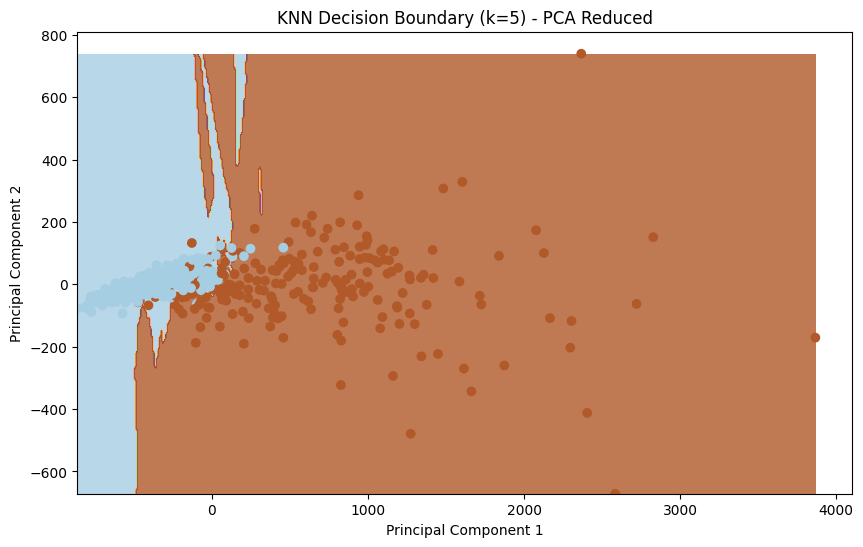

4070

In [14]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed
import gc

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

clf = KNeighborsClassifier(n_neighbors=k, algorithm='kd_tree')

print("X_pca shape:", X_pca.shape)
print("y shape:", y.shape)

clf.fit(X_pca, y)

h = 10  # 그리드 간격을 더 크게 설정하여 계산량 줄이기
x_min, x_max = X_pca[:, 0].min() - 0.1, X_pca[:, 0].max() + 0.1
y_min, y_max = X_pca[:, 1].min() - 0.1, X_pca[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

def parallel_predict(X_slice):
    return clf.predict(X_slice)

X_grid = np.c_[xx.ravel(), yy.ravel()]
Z = Parallel(n_jobs=-1)(
    delayed(parallel_predict)(X_grid[i:i + 1000]) for i in range(0, len(X_grid), 1000)
)

del X_grid
gc.collect()

Z = np.concatenate(Z).reshape(xx.shape)
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title(f'KNN Decision Boundary (k={k}) - PCA Reduced')
plt.show()

del Z, xx, yy
gc.collect()

## Experimenting with Weighted KNN (Optional)

Comparing different neighbor sizes using a loop

In [15]:
# Define a range of values for the number of neighbors
neighbors = np.arange(1, 21)

# Initialize an empty list to store accuracy scores
accuracy_scores = []
precision_scores = []
recall_scores = []

# Iterate over different values of neighbors
for n in neighbors:
    # Create an instance of the KNN classifier with the current number of neighbors
    knn = KNeighborsClassifier(n_neighbors=n)

    # Fit the KNN classifier to the training data
    knn.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn.predict(X_test)

    # Compute the accuracy score and append it to the list
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

    precision = precision_score(y_test, y_pred)
    precision_scores.append(precision)

    recall = recall_score(y_test, y_pred)
    recall_scores.append(recall)

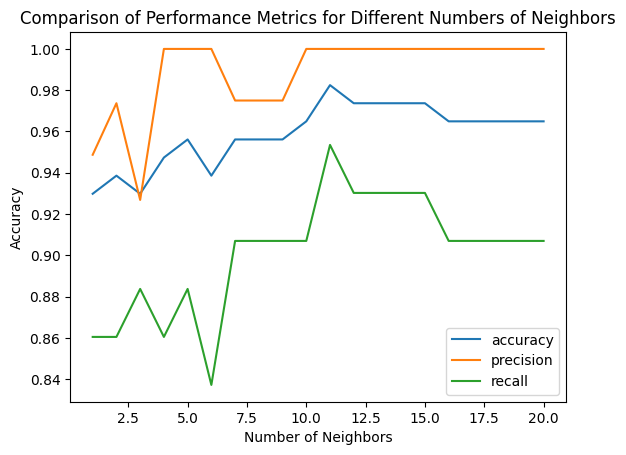

In [16]:
# Plot the accuracy scores
plt.plot(neighbors, accuracy_scores, label='accuracy')
plt.plot(neighbors, precision_scores, label='precision')
plt.plot(neighbors, recall_scores, label='recall')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Comparison of Performance Metrics for Different Numbers of Neighbors')
plt.legend()
plt.show()

In [17]:
# SelectKBest is a class from scikit-learn used for feature selection. It selects the top k most
# important features based on a specific scoring function
# f_classif is one of the scoring functions available in scikit-learn. It computes the ANOVA F-statistic
# between each feature and the target variable in a classification problem. This score helps rank features
# by their relevance to the target variable
from sklearn.feature_selection import SelectKBest, f_classif

# Set the value of 'k' again
k = 5

# Create an instance of the KNN classifier with distance-based weights
knn_weighted = KNeighborsClassifier(n_neighbors=k, weights='distance')

# Select the top k features based on ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=5)  # Select the top 5 features
X_selected = selector.fit_transform(X, y)

# Get the mask of selected features
selected_features_mask = selector.get_support()

# List of selected feature indices
selected_feature_indices = [i for i, selected in enumerate(selected_features_mask) if selected]

# Print the selected feature indices
print("Selected Features:")

for i in range(len(selected_feature_indices)):
    print(data.columns[selected_feature_indices[i]])

Selected Features:
texture_mean
concavity_mean
fractal_dimension_se
texture_worst
concavity_worst


In [18]:
# Splitting the selected features into train and test
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Fit the weighted KNN classifier to the training data
knn_weighted.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_weighted = knn_weighted.predict(X_test)

# Evaluate the performance of the KNN model
accuracy = accuracy_score(y_test, y_pred_weighted)
print("Accuracy:", accuracy)

precision = precision_score(y_test, y_pred_weighted)
print("Precision:", precision)

recall = recall_score(y_test, y_pred_weighted)
print("Recall:", recall)

Accuracy: 0.9649122807017544
Precision: 1.0
Recall: 0.9069767441860465
